## Deep Learning 4th Lab

In [7]:
import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from keras.utils import to_categorical, plot_model
import time
from tensorflow.keras import layers

## 1-Load the cifar-10 dataset

In [8]:
(x_train, y_train), (x_val, y_val) =  keras.datasets.cifar10.load_data()

In [9]:
x_train.shape

(50000, 32, 32, 3)

## Data Visualization 

['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


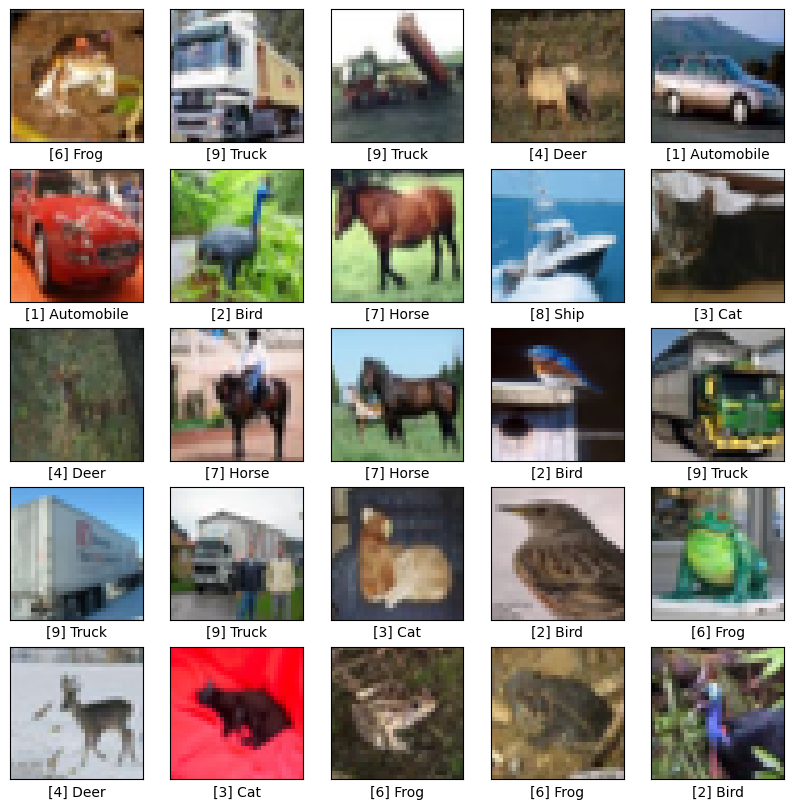

In [10]:
class_names =['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print(class_names)

plt.figure(figsize=(10,10))
for i in range(25): 
  plt.subplot(5,5,i+1) 
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary) 
    
  plt.xlabel("%s %s" % (y_train[i], class_names[y_train[i][0]])) 
plt.show()

## Check the distribution of the class 

Text(0.5, 1.0, 'Class distribution in training set')

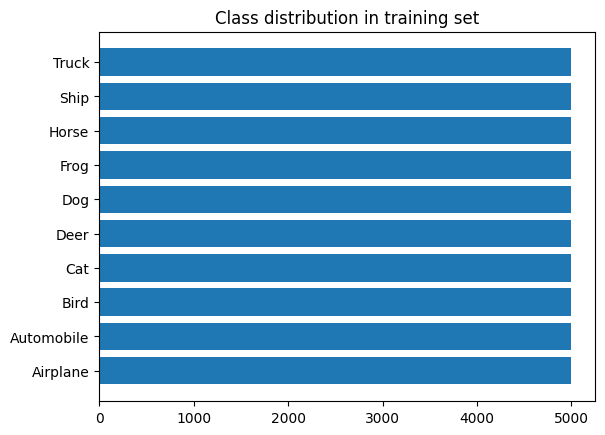

In [11]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

## 2- Create a convolutional neural network via Keras

## For preprocessing we're going to add a normalization layer in the model architecture

In [12]:
num_classes = 10

model = tf.keras.models.Sequential([
    layers.Rescaling(1./255, input_shape=(32, 32, 3)),
    layers.Conv2D(16, (3,3),padding='valid', activation='relu'),
    layers.Conv2D(16, (3,3),padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='valid'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='valid'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    

    layers.Dense(num_classes, activation='softmax')
    
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 32)        9248      
                                                        

## 3. Fit the neural network for the training data.

In [14]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

In [15]:
start_time = time.time()
history = model.fit(x_train, y_train, epochs=5, batch_size=64,  validation_data=(x_val,y_val), shuffle=True)
end_time = time.time()
training_time = end_time - start_time
print(f"Running time : {training_time} seconds")

Epoch 1/5
782/782 [==============================] - 18s 21ms/step - loss: 1.6347 - accuracy: 0.4063 - val_loss: 1.3748 - val_accuracy: 0.5045
Epoch 2/5
782/782 [==============================] - 15s 20ms/step - loss: 1.3096 - accuracy: 0.5353 - val_loss: 1.2807 - val_accuracy: 0.5504
Epoch 3/5
782/782 [==============================] - 16s 20ms/step - loss: 1.1833 - accuracy: 0.5841 - val_loss: 1.1611 - val_accuracy: 0.5887
Epoch 4/5
782/782 [==============================] - 16s 20ms/step - loss: 1.0855 - accuracy: 0.6213 - val_loss: 1.0843 - val_accuracy: 0.6216
Epoch 5/5
782/782 [==============================] - 16s 20ms/step - loss: 1.0118 - accuracy: 0.6464 - val_loss: 1.0134 - val_accuracy: 0.6444
Running time : 80.61359524726868 seconds


<h3> define a function for plotting the curves for each model </h3> 

In [16]:
def plot_learning_curves(history, title):
    plt.figure(figsize=(12, 4))
    
    
    plt.subplot(1, 2, 1)
    plt.plot( history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title + ' - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot( history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title + ' - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

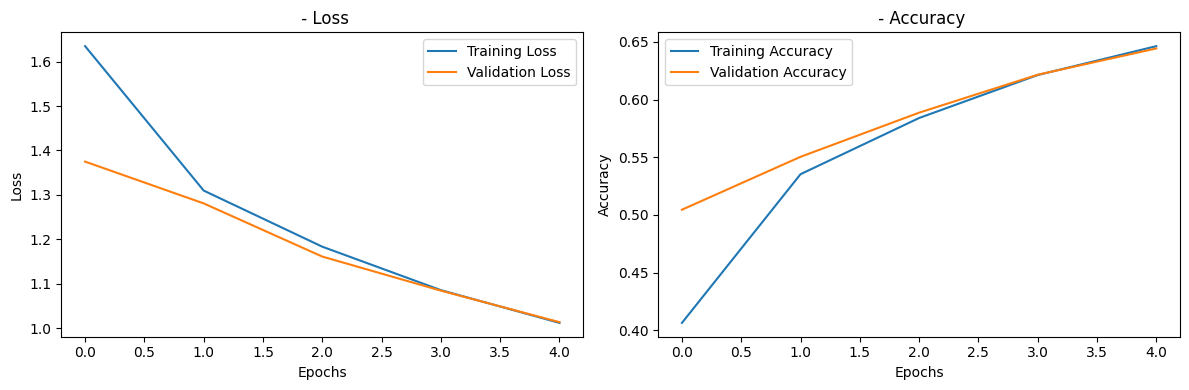

In [17]:
plot_learning_curves(history, '')

## Try to improve performance by adding Dropout 

In [18]:
model_2 = tf.keras.models.Sequential([
    layers.Rescaling(1./255, input_shape=(32, 32, 3)),
    layers.Conv2D(16, (3,3),padding='valid', activation='relu'),
    layers.Conv2D(16, (3,3),padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),

    
    layers.Conv2D(32, (3, 3), activation='relu', padding='valid'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='valid'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    
    

    layers.Dense(num_classes, activation='softmax')
    
])

In [19]:
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

In [20]:
start_time = time.time()
history_2 = model_2.fit(x_train, y_train, epochs=5, batch_size=64,  validation_data=(x_val,y_val), shuffle=True)
end_time = time.time()
training_time = end_time - start_time
print(f"Running time : {training_time} seconds")

Epoch 1/5
782/782 [==============================] - 20s 23ms/step - loss: 1.7035 - accuracy: 0.3742 - val_loss: 1.4224 - val_accuracy: 0.4868
Epoch 2/5
782/782 [==============================] - 18s 23ms/step - loss: 1.3314 - accuracy: 0.5216 - val_loss: 1.1963 - val_accuracy: 0.5809
Epoch 3/5
782/782 [==============================] - 18s 22ms/step - loss: 1.1959 - accuracy: 0.5772 - val_loss: 1.1041 - val_accuracy: 0.6078
Epoch 4/5
782/782 [==============================] - 18s 23ms/step - loss: 1.1101 - accuracy: 0.6085 - val_loss: 1.0422 - val_accuracy: 0.6333
Epoch 5/5
782/782 [==============================] - 18s 23ms/step - loss: 1.0477 - accuracy: 0.6325 - val_loss: 0.9829 - val_accuracy: 0.6545
Running time : 91.0808436870575 seconds


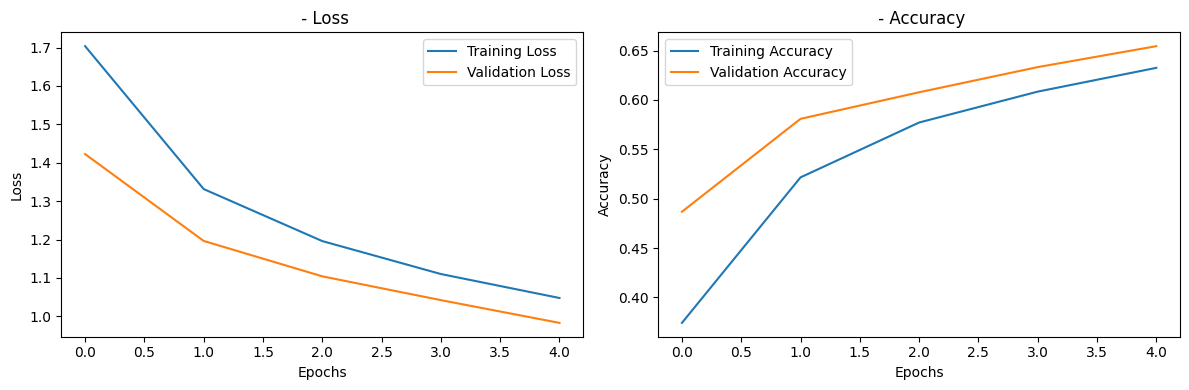

In [21]:
plot_learning_curves(history_2, '')

## Try to improve performance by adding Data Augmentation

In [22]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(32,32,3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
  ]
)

In [23]:
model_3 = tf.keras.models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(32, 32, 3)),
    layers.Conv2D(16, (3,3),padding='valid', activation='relu'),
    layers.Conv2D(16, (3,3),padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(32, (3, 3), activation='relu', padding='valid'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='valid'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    
    

    layers.Dense(num_classes, activation='softmax')
    
])

In [24]:
model_3.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

In [25]:
start_time = time.time()
history_3 = model_3.fit(x_train, y_train, epochs=5, batch_size=64,  validation_data=(x_val,y_val), shuffle=True)
end_time = time.time()
training_time = end_time - start_time
print(f"Running time : {training_time} seconds")

Epoch 1/5
782/782 [==============================] - 25s 29ms/step - loss: 1.8714 - accuracy: 0.3122 - val_loss: 1.6959 - val_accuracy: 0.3868
Epoch 2/5
782/782 [==============================] - 22s 28ms/step - loss: 1.6691 - accuracy: 0.3950 - val_loss: 1.6444 - val_accuracy: 0.4141
Epoch 3/5
782/782 [==============================] - 21s 27ms/step - loss: 1.5949 - accuracy: 0.4250 - val_loss: 1.5060 - val_accuracy: 0.4587
Epoch 4/5
782/782 [==============================] - 21s 27ms/step - loss: 1.5364 - accuracy: 0.4469 - val_loss: 1.3971 - val_accuracy: 0.5021
Epoch 5/5
782/782 [==============================] - 21s 27ms/step - loss: 1.4928 - accuracy: 0.4630 - val_loss: 1.4559 - val_accuracy: 0.4749
Running time : 111.02505373954773 seconds


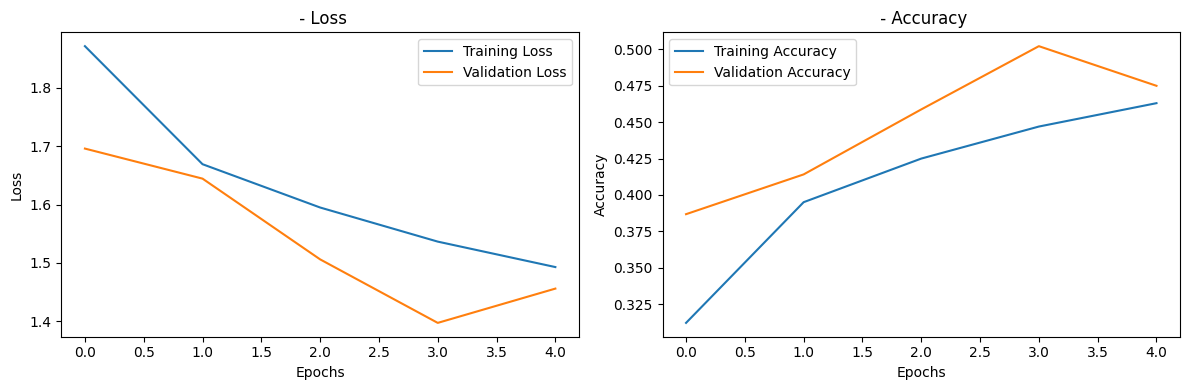

In [26]:
plot_learning_curves(history_3, '')

## Try to improve performance by changing the architecture (layers) and adding depth 

In [27]:
model_4 = tf.keras.models.Sequential([
    layers.Rescaling(1./255, input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3,3),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),
    
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.5),

    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.5),  
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    
    

    layers.Dense(num_classes, activation='softmax')
    
])

In [31]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)       

In [28]:
model_4.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

In [29]:
start_time = time.time()
history_4 = model_4.fit(x_train, y_train, epochs=5, batch_size=64,  validation_data=(x_val,y_val), shuffle=True)
end_time = time.time()
training_time = end_time - start_time
print(f"Running time : {training_time} seconds")

Epoch 1/5
782/782 [==============================] - 101s 125ms/step - loss: 1.7451 - accuracy: 0.4042 - val_loss: 1.3203 - val_accuracy: 0.5306
Epoch 2/5
782/782 [==============================] - 96s 122ms/step - loss: 1.1837 - accuracy: 0.5760 - val_loss: 0.9997 - val_accuracy: 0.6457
Epoch 3/5
782/782 [==============================] - 89s 114ms/step - loss: 0.9872 - accuracy: 0.6537 - val_loss: 0.9388 - val_accuracy: 0.6792
Epoch 4/5
782/782 [==============================] - 92s 117ms/step - loss: 0.8800 - accuracy: 0.6932 - val_loss: 0.8088 - val_accuracy: 0.7221
Epoch 5/5
782/782 [==============================] - 92s 117ms/step - loss: 0.8121 - accuracy: 0.7174 - val_loss: 0.7499 - val_accuracy: 0.7417
Running time : 470.0587821006775 seconds


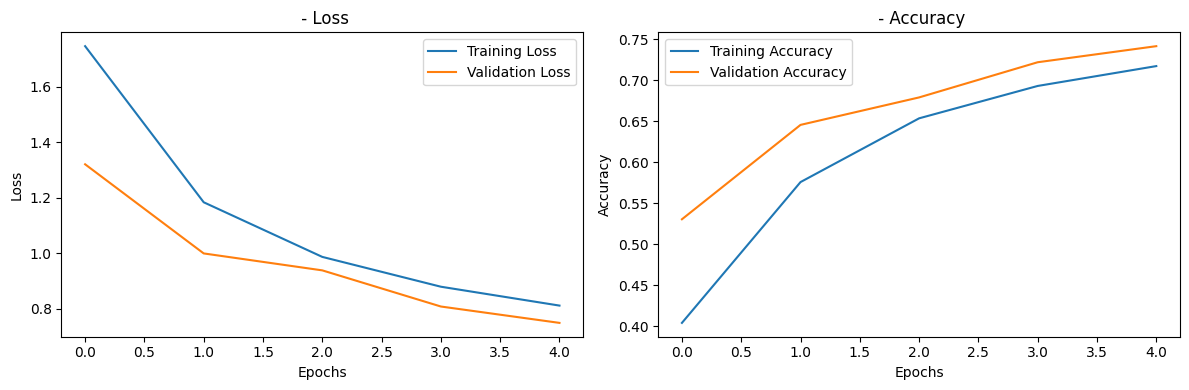

In [30]:
plot_learning_curves(history_4, '')